Uploading Image & Splitting into Colored Arrays

In [ ]:
import matplotlib.image as img
og_image = img.imread("IMG_1876.jpg")
red = og_image[:,:,0]/0xff
green = og_image[:,:,1]/0xff
blue = og_image[:,:,2]/0xff

Extracting Singular Values from Colors

In [ ]:
import numpy as np
import math 
red_u, red_s, red_vh = np.linalg.svd(red)
blue_u, blue_s, blue_vh = np.linalg.svd(blue)
green_u, green_s, green_vh = np.linalg.svd(green)

Defining a Function to Compute Decomposition. In this case, k = the # of singular values.

In [ ]:
def compute_Ak(U, Sigma, V, k):
    U_k = U[:, :k]
    Sigma_k = Sigma[:k]
    V_k = V[:k, :]
    return U_k @ np.diag(Sigma_k) @ V_k

Applying SVD Decompression to Show Compressed Image

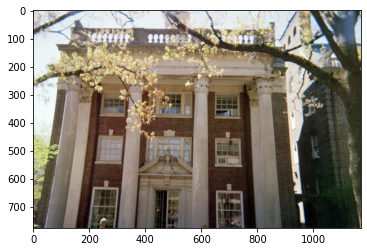

In [ ]:

red_k = math.floor(np.linalg.matrix_rank(red)/2)
blue_k = math.floor(np.linalg.matrix_rank(blue)/2)
green_k = math.floor(np.linalg.matrix_rank(green)/2)

fin_red = (compute_Ak(red_u, red_s, red_vh, red_k) * 0xff).astype(np.uint8)
fin_green = (compute_Ak(green_u, green_s, green_vh, green_k) * 0xff).astype(np.uint8)
fin_blue = (compute_Ak(blue_u, blue_s, blue_vh, blue_k) * 0xff).astype(np.uint8)

image = np.dstack((fin_red, fin_green, fin_blue))
import matplotlib.pyplot as plt
plt.imshow(image)


I see a extremely slight and not jurastic decrease in quality which is very great for this image. I cannot tell whether this is because of the code editor or because of the image compression itself, but in any case, the image is so close to the original so as to be a very great compression algorithm!

In [ ]:
#Creating a function to automate above process for any input %
def compress_image(percentCompress):
  red_k = math.floor(np.linalg.matrix_rank(red)*percentCompress)
  blue_k = math.floor(np.linalg.matrix_rank(blue)*percentCompress)
  green_k = math.floor(np.linalg.matrix_rank(green)*percentCompress)


  fin_red = (compute_Ak(red_u, red_s, red_vh, red_k) * 0xff).astype(np.uint8)
  fin_green = (compute_Ak(green_u, green_s, green_vh, green_k) * 0xff).astype(np.uint8)
  fin_blue = (compute_Ak(blue_u, blue_s, blue_vh, blue_k) * 0xff).astype(np.uint8)
  image = np.dstack((fin_red, fin_green, fin_blue))
  import matplotlib.pyplot as plt
  plt.imshow(image)


Running the above process for different singular values

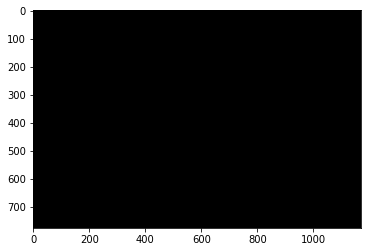

In [ ]:
compress_image(0)

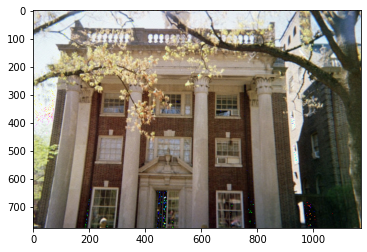

In [ ]:

compress_image(0.2)

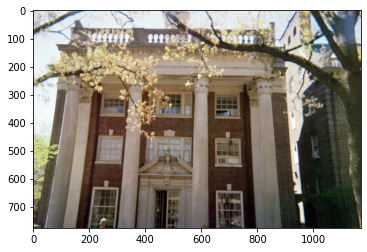

In [ ]:

compress_image(0.8)

I think that the image quality starts to drop off at 0.4. This is because at this point we start to see colors that were surely not in the original photo, which can be seen in the reflections of the windows on the house. 

In [ ]:


#For my k, I'm choosing 0.6 where I think the image is still good quality
red_k = math.floor(np.linalg.matrix_rank(red)*0.6)
blue_k = math.floor(np.linalg.matrix_rank(blue)*0.6)
green_k = math.floor(np.linalg.matrix_rank(green)*0.6)


fin_red = (compute_Ak(red_u, red_s, red_vh, red_k) * 0xff).astype(np.uint8)
fin_green = (compute_Ak(green_u, green_s, green_vh, green_k) * 0xff).astype(np.uint8)
fin_blue = (compute_Ak(blue_u, blue_s, blue_vh, blue_k) * 0xff).astype(np.uint8)
image = np.dstack((fin_red, fin_green, fin_blue))


Assumption of the below calculation is that every pixel that is different in the final compressed image than it is in the original image is a pixel that was compressed and therefore saved. 

In [ ]:
#gives the percent of the image that was compressed or storage that was saved
np.count_nonzero(image==og_image) / np.count_nonzero(og_image)


0.4895839541462948